# CS898BD Assignment 2 - Question 1: Dataset Preparation

## Tiny ImageNet Dataset Processing

**Purpose:** To customize the Tiny ImageNet dataset.

**Methodology:**
- Consider only 100 classes from the dataset.
- From each class, take 500 images.
- Split the dataset into training, testing and validation sets with the following distribution:
    - Training      —   30,000
    - Testing       —   10,000
    - Validation    —   10,000
- Prepare data for our model as described in section 2 of the AlexNet Paper.
- Thoroughly document the code.

## 1. Import Required Libraries

Import all necessary libraries for dataset processing, visualization, and file operations.

In [1]:
import torch
# import torchvision.transforms as transforms
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import random
# from torch.utils.data import Dataset, DataLoader

# For saving the dataset
import pickle
import os

# Set seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

## 2. Initialize Dataset

Create an instance of our dataset.

In [2]:
# Load dataset from Hugging Face
dataset = load_dataset("zh-plus/tiny-imagenet")

## Checking key names
# print(f"Dataset keys: {list(dataset.keys())}")
## Output: Dataset keys: ['train', 'valid']

# Print out the number of samples in each set
print(f"Train samples: {len(dataset['train'])}")
print(f"Validation samples: {len(dataset['valid'])}")


Train samples: 100000
Validation samples: 10000


## 3. Download Tiny ImageNet Dataset

Download the original Tiny ImageNet dataset. This contains 200 classes with 500 training images each.

**Note**: This is a large download (~237MB) and may take several minutes depending on your internet connection.

Total samples: 100000
Features: {'image': Image(mode=None, decode=True), 'label': ClassLabel(names=['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640', 'n01742172', 'n01768244', 'n01770393', 'n01774384', 'n01774750', 'n01784675', 'n01882714', 'n01910747', 'n01917289', 'n01944390', 'n01950731', 'n01983481', 'n01984695', 'n02002724', 'n02056570', 'n02058221', 'n02074367', 'n02094433', 'n02099601', 'n02099712', 'n02106662', 'n02113799', 'n02123045', 'n02123394', 'n02124075', 'n02125311', 'n02129165', 'n02132136', 'n02165456', 'n02226429', 'n02231487', 'n02233338', 'n02236044', 'n02268443', 'n02279972', 'n02281406', 'n02321529', 'n02364673', 'n02395406', 'n02403003', 'n02410509', 'n02415577', 'n02423022', 'n02437312', 'n02480495', 'n02481823', 'n02486410', 'n02504458', 'n02509815', 'n02666347', 'n02669723', 'n02699494', 'n02769748', 'n02788148', 'n02791270', 'n02793495', 'n02795169', 'n02802426', 'n02808440', 'n02814533', 'n02814860', 'n02815834', 'n02823428', 'n02837789', 'n0

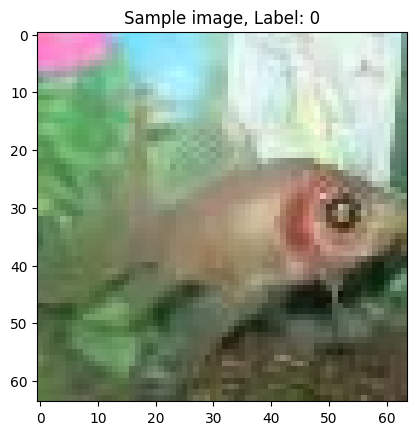

In [3]:
# Look at the data
train_data = dataset['train']
print(f"Total samples: {len(train_data)}")
print(f"Features: {train_data.features}")

# Show first image
sample = train_data[0]
plt.imshow(sample['image'])
plt.title(f"Sample image, Label: {sample['label']}")
plt.show()

## 4. Merge Train and Valid For Recasting
Since we didn't have a training dataset, we are going to merge the existing samples and re-split them. For now let's combine the two sets and then filter it down to what we need (100 classes).

In [4]:
# Combine train and validation data sets so that we can split it into train, validation, and test sets
all_data = []
all_data.extend(dataset['train'])
all_data.extend(dataset['valid'])

# Get all labels and pick 100 random classes
all_labels = list(set([sample['label'] for sample in all_data]))
print(f"Total classes available: {len(all_labels)}")

# Select 100 random classes (random seed set for reproducibility)
selected_classes = random.sample(all_labels, 100)

# Filter dataset for selected classes and sample 500 per class
filtered_data = []
for label in selected_classes:
    class_samples = [sample for sample in all_data if sample['label'] == label]
    if len(class_samples) >= 500:
        class_samples = random.sample(class_samples, 500)
    filtered_data.extend(class_samples)

print(f"Total samples after filtering: {len(filtered_data)}")

Total classes available: 200
Total samples after filtering: 50000
Total samples after filtering: 50000


## 5. Split Dataset into Train/Test/Validation

Split the custom dataset into the required splits:
- Training: 30,000 images  
- Testing: 10,000 images
- Validation: 10,000 images

In [5]:
# Shuffle the filtered data so we can split it randomly
random.shuffle(filtered_data)

# Simple split: first random 30k for train, next 10k for test, finally the last 10k for valid
train_split = filtered_data[:30000]
test_split = filtered_data[30000:40000] 
valid_split = filtered_data[40000:50000]

print(f"Train: {len(train_split)}")
print(f"Test: {len(test_split)}")
print(f"Valid: {len(valid_split)}")
print("Done!")

Train: 30000
Test: 10000
Valid: 10000
Done!


## 6. Save it for later!
Now we just need to save our dataset so we can use it in Question 2!

In [7]:
# Save the dataset splits for Question 2
# Create data directory if it doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# Pickle each split
with open('../data/processed/train_split.pkl', 'wb') as f:
    pickle.dump(train_split, f)

with open('../data/processed/test_split.pkl', 'wb') as f:
    pickle.dump(test_split, f)

with open('../data/processed/valid_split.pkl', 'wb') as f:
    pickle.dump(valid_split, f)

# Also save the selected classes for reference
with open('../data/processed/selected_classes.pkl', 'wb') as f:
    pickle.dump(selected_classes, f)

print("Dataset saved successfully!")
print(f"Saved to: ../data/processed/")

Dataset saved successfully!
Saved to: ../data/processed/


# DONE!
We now have our properly split dataset with the requisite number of classes and samples in each set!

**Q1 Complete!**